In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes

In [60]:
diabetes_data = load_diabetes()

In [61]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [62]:
diabetes_features_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_target_df = pd.DataFrame(diabetes_data.target, columns=['target'])

In [63]:
diabetes_features_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [64]:
diabetes_target_df.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [65]:
combined_df = pd.concat([diabetes_features_df,diabetes_target_df],axis=1)
combined_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


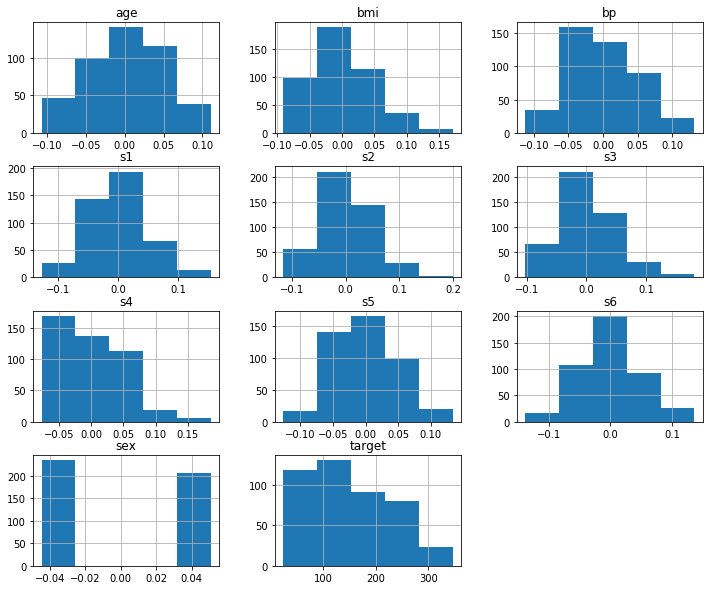

In [66]:
combined_df.hist(bins=5, figsize=(12,10), grid=True)
plt.show()

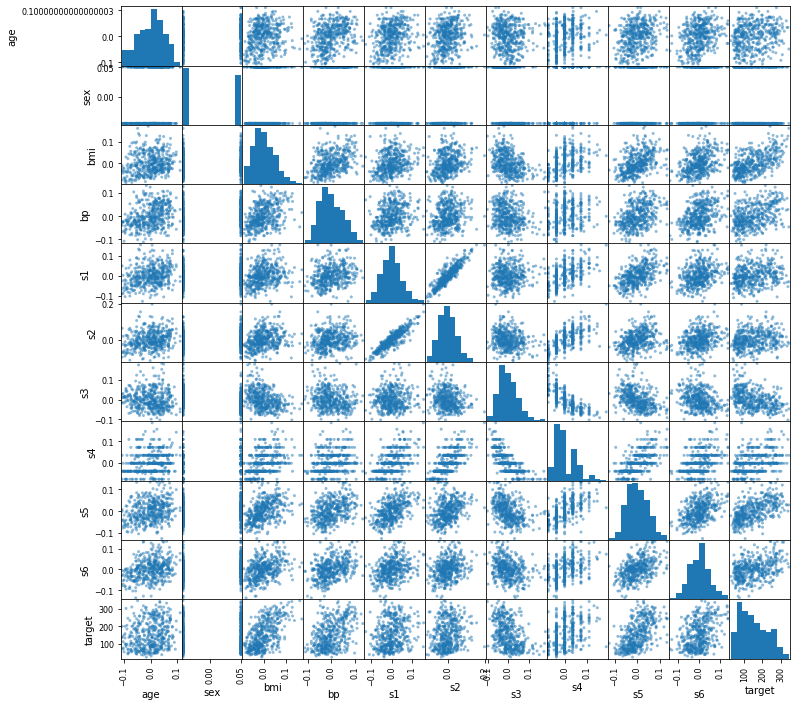

In [91]:
pd.plotting.scatter_matrix(combined_df, figsize=(12,12))
plt.show()

In [71]:
corr = combined_df.corr() 
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


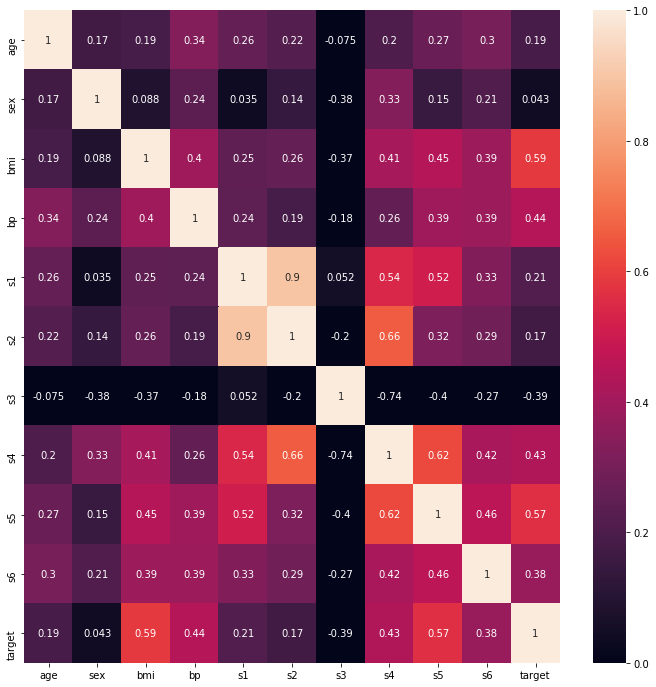

In [72]:
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, vmin=0, vmax=1, annot=True)


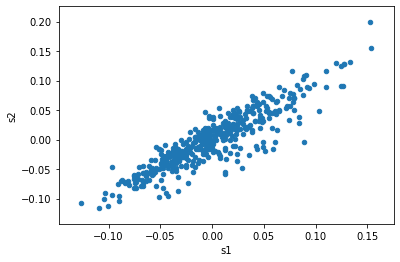

In [73]:
combined_df.plot(x='s1',y='s2',kind='scatter')

In [74]:
diabetes_features_df = diabetes_features_df.drop(['s2'],axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test, y_train,y_test = train_test_split(diabetes_features_df,diabetes_target_df,test_size=0.2, random_state=111)

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(353, 9)
(353, 1)
(89, 9)
(89, 1)


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [79]:
lr = LinearRegression()

In [80]:
model = lr.fit(X_train,y_train)

In [81]:
y_pred = model.predict(X_test)
y_pred.shape

(89, 1)

In [82]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.45984024795629164
2538.9921027789846


In [83]:
print(type(y_test))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [84]:
final_array=np.concatenate((y_test.values,y_pred),axis=1)

In [85]:
output_df = pd.DataFrame(final_array,columns=['Actual','Predicted'])
output_df

,Actual,Predicted
0,259.0,238.750625
1,128.0,101.142958
2,116.0,141.870469
3,196.0,158.788662
4,220.0,202.473440
...,...,...
84,168.0,139.812107
85,84.0,93.013445
86,244.0,172.601669
87,37.0,80.324882


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {'n_estimators': [50,100,200],
             'min_samples_leaf' : [2,5,7,1,15,20]}
gs_cv = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,cv=20, scoring='neg_mean_squared_error')

print(gs_cv)

GridSearchCV(cv=20, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [ ]:
results = gs_cv.fit(X_train,y_train.values.ravel())
print(results)

In [ ]:
print(results.best_score_)
print(results.best_estimator_)
print(results.best_params_)

In [56]:
model =results.best_estimator_
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.3313276046337771
